# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import datetime
import random
%matplotlib inline

In [2]:
df=pd.read_csv('disney_plus_titles.csv')
df.shape

(1368, 12)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [6]:
# Creating new columns from existing column

df[['g1','g2','g3']] = df['listed_in'].str.split(',', expand = True)

In [7]:
# Removing unnecessary columns

df.drop(['show_id', 'description', 'listed_in'], axis = 1 ,inplace = True)

In [8]:
# Checking the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1368 non-null   object
 1   title         1368 non-null   object
 2   director      928 non-null    object
 3   cast          1194 non-null   object
 4   country       1193 non-null   object
 5   date_added    1365 non-null   object
 6   release_year  1368 non-null   int64 
 7   rating        1366 non-null   object
 8   duration      1368 non-null   object
 9   g1            1368 non-null   object
 10  g2            1314 non-null   object
 11  g3            1031 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [9]:
# Checking for null values

df.isnull().sum()

type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
g1                0
g2               54
g3              337
dtype: int64

In [10]:
# Flling null values

df['director'] = df['director'].fillna('without director reference')
df['director'].isnull().sum()

0

In [11]:
df['cast'] = df['cast'].fillna('without cast reference')
df['cast'].isnull().sum()

0

In [12]:
df['country'] = df['country'].fillna('without country reference')
df['country'].isnull().sum()

0

In [13]:
df['rating'] = df['rating'].fillna('without rating')
df['rating'].isnull().sum()

0

In [14]:
# Filling null values 

df.fillna(0, inplace = True)
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
g1              0
g2              0
g3              0
dtype: int64

In [15]:
# Checking for duplicated values

df.duplicated().sum()

0

# Data Visualization

### Questions to be answered-

##### 1. Which year of 20s released more numbers of Movies/TV Shows?
##### 2. Show the difference in Movies released and TV Shows released of top 3 year of 20s having the most released.
##### 3. What are the total number of movies and tv shows released?
##### 4. Which year of 20s has released the most Action-Adventure movies/tv shows?
##### 5. Which category of rating has the most number of releases?

#### Que1. Which year of 20s released more numbers of Movies/TV Shows?

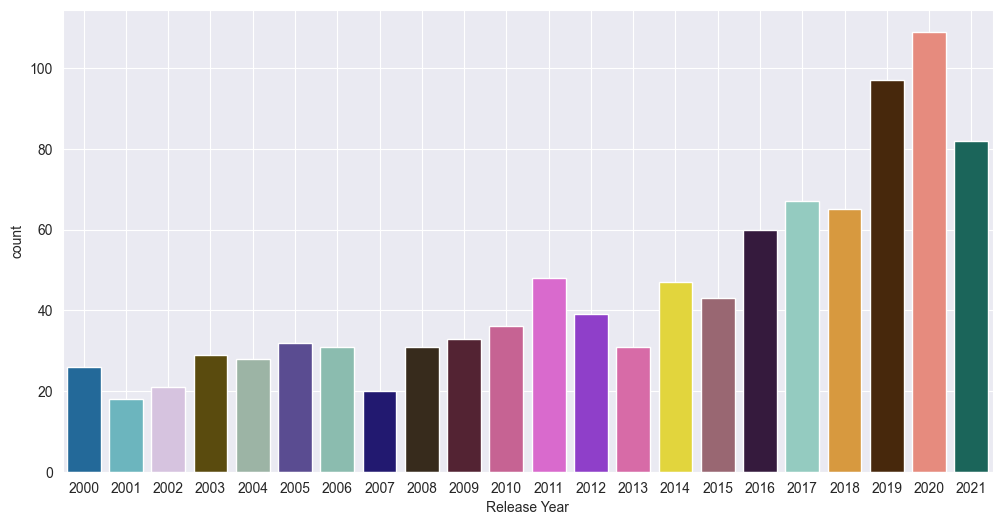

In [21]:
ans1 = df.query('release_year >= 2000')
num_bars = ans1['release_year'].nunique()
random_colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(num_bars)]
plt.figure(figsize = (12,6))
sns.set_style('dark')
sns.countplot(data=ans1, x='release_year', hue='release_year', palette=random_colors, legend=False)
plt.xlabel('Release Year')
plt.grid(True)
plt.show()

#### Answer- Year 2020 released the hightest number of shows.

#### Que2. Show the differences between Movies released and TV Shows released of top three years of 20s having the most released.

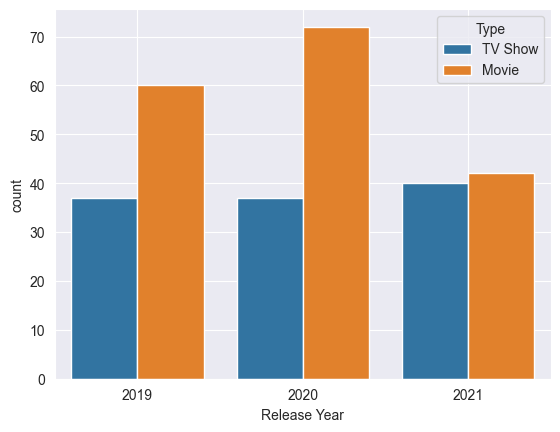

In [17]:
ans2 = df.query('release_year == [2020,2021,2019]')
sns.countplot(ans2, x = 'release_year', hue = 'type')
plt.legend(title = "Type")
plt.xlabel('Release Year')
plt.grid(True)
plt.show()

#### Answer- Showing the difference between Movies released and TV Shows released of 2019, 2020 and 2021.

#### Que3. What are the total number of movies and tv shows released?

In [18]:
ans3 = df['type'].value_counts()
ans3

type
Movie      991
TV Show    377
Name: count, dtype: int64

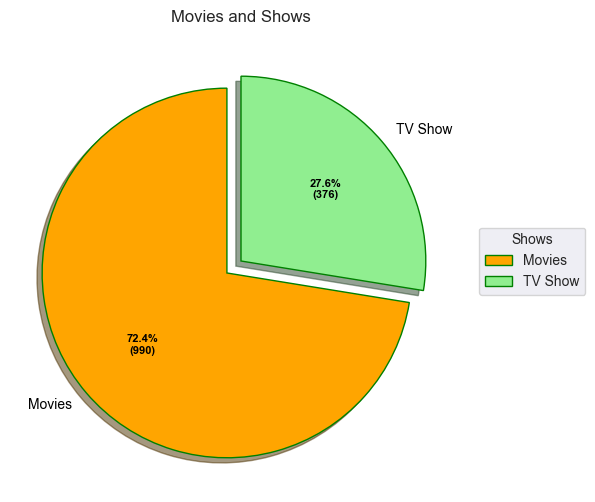

In [34]:
explode = (0.1, 0.0)
colors = ("orange", "lightgreen")
wp = {'linewidth': 1, 'edgecolor': "green"}
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(ans3, labels = ['Movies', 'TV Show'],
                                  autopct=lambda pct: func(pct, ans3),
                                  explode=explode,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black"))
ax.legend(labels = ['Movies', 'TV Show'],
          title="Shows",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Movies and Shows")
plt.show()

#### Answer-
##### Total number of Movie released is 990
##### Total number of TV Shows released is 376

#### Que4. Which year of 20s has released the most number of Action-Adventure movies/tv shows?

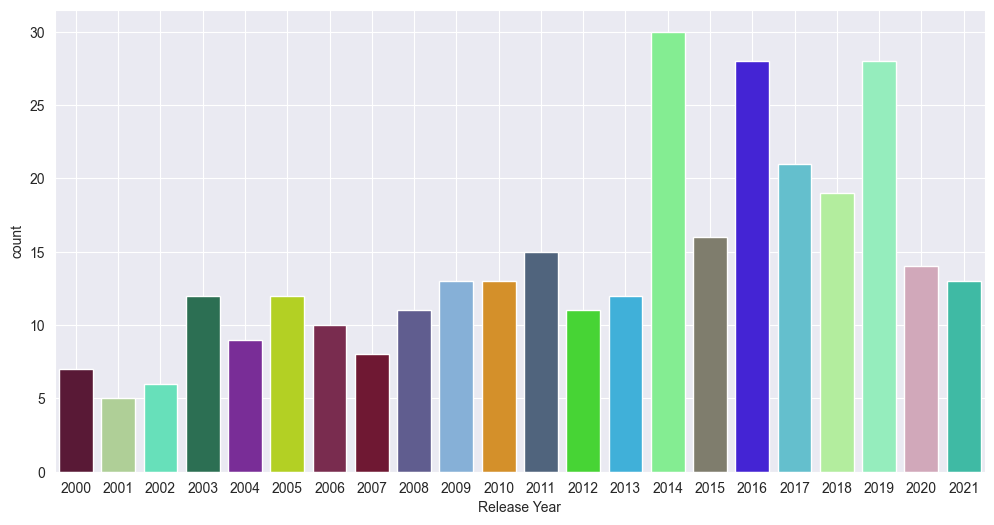

In [42]:
acad = df.query("release_year >= 2000 and (g1 == 'Action-Adventure' or g2 == 'Action-Adventure' or g3 == 'Action-Adventure')")
num_bars = len(acad['release_year'].unique())
random_colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(num_bars)]
plt.figure(figsize=(12, 6))
sns.countplot(data=acad, x='release_year',hue='release_year', palette=random_colors, legend=False)
plt.xlabel('Release Year')
plt.grid(True)
plt.show()

#### Answer- 2014 has released the most number of Action-Adventure movies/shows.

#### Que5. Which category of rating has the most number of releases?

In [55]:
ans5 = df['rating'].value_counts()
ans5

rating
TV-G              307
TV-PG             275
G                 235
PG                227
TV-Y7             130
TV-14              72
PG-13              60
TV-Y               48
TV-Y7-FV           12
without rating      2
Name: count, dtype: int64

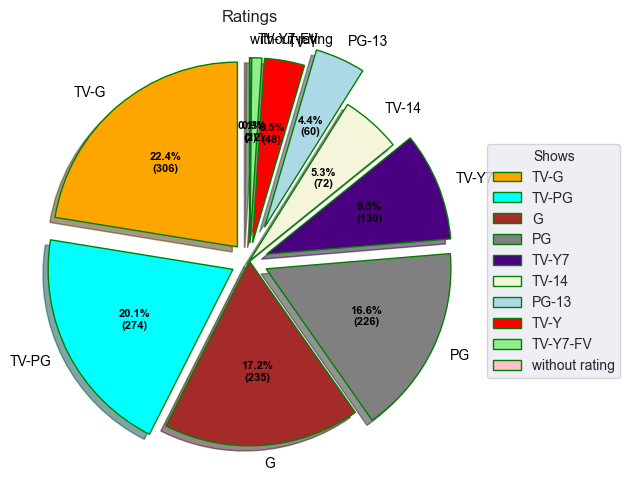

In [56]:
xplode = (0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.2, 0.1, 0.1, 0.3)
colors = ("orange", "cyan", "brown",
          "grey", "indigo", "beige", "lightblue", "red", "lightgreen", "pink")
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(ans5, labels = ['TV-G', 'TV-PG', 'G', 'PG', 'TV-Y7', 'TV-14', 'PG-13', 'TV-Y', 'TV-Y7-FV', 'without rating'],
                                  autopct=lambda pct: func(pct, ans5),
                                  explode=explode,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black"))
ax.legend(labels = ['TV-G', 'TV-PG', 'G', 'PG', 'TV-Y7', 'TV-14', 'PG-13', 'TV-Y', 'TV-Y7-FV', 'without rating'],
          title="Shows",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Ratings")
plt.show()

#### Answer- TV-G has the most number of releases viz 306